In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import os
import collections
import re 
from imageio import imread, imwrite
from multiprocessing import Pool
import matplotlib.pyplot as plt
import cv2
import gdown
#import matplotlib.pyplot as plt

## Check Converting Mask Code

In [3]:
cut_down_mapping = {
    0: 0,
    1: 0,
    2: 5,
    3: 0,
    4: 8,
    5: 8,
    6: 8,
    7: 1,
    8: 1,
    9: 1,
    10: 1,
    11: 4,
    12: 4,
    13: 4,
    14: 4,
    15: 4,
    16: 4,
    17: 5,
    18: 5,
    19: 5,
    20: 5,
    21: 6,
    22: 6,
    23: 7,
    24: 2,
    25: 2,
    26: 3,
    27: 3,
    28: 3,
    29: 3,
    30: 3,
    31: 3,
    32: 3,
    33: 3,
}
labels = {
    'unlabeled':  0 ,
    'ego vehicle':  1 ,
    'rectification border':  2 ,
    'out of roi' :  3 ,
    'static' :  4 ,
    'dynamic' :  5 ,
    'ground'    :  6 ,
    'road'      :  7 ,
    'sidewalk'  :  8 ,
    'parking'   :  9 ,
    'rail track': 10 ,
    'building'  : 11 ,
    'wall'      : 12 ,
    'fence'     : 13 ,
    'guard rail': 14 ,
    'bridge'    : 15 ,
    'tunnel'    : 16 ,
    'pole'      : 17 ,
    'polegroup' : 18 ,
    'traffic light': 19 ,
    'traffic sign'  : 20 ,
    'vegetation'    : 21 ,
    'terrain'       : 22 ,
    'sky'           : 23 ,
    'person'        : 24 ,
    'rider'         : 25 ,
    'car'           : 26 ,
    'truck'         : 27 ,
    'bus'           : 28 ,
    'caravan'       : 29 ,
    'trailer'       : 30 ,
    'train'         : 31 ,
    'motorcycle'    : 32 ,
    'bicycle'       : 33 ,
    'license plate' : -1 
}


color_map = {
    0: [0, 0, 0],
    1: [239, 234, 90],
    2: [44, 105, 154],
    3: [4, 139, 168],
    4: [13, 179, 158],
    5: [131, 227, 119],
    6: [185, 231, 105],
    7: [107, 137, 198],
    8: [241, 196, 83],
    9: [242, 158, 76],
    10: [234, 114, 71],
    11: [215, 95, 155],
    12: [207, 113, 192],
    13: [159, 89, 165],
    14: [142, 82, 172],
    15: [158, 115, 200], 
    16: [116, 95, 159],
}

In [4]:

#Reading an image, Simplifing it's labels to only 8 labels instead of 33 
def simplify_image_labels(image,viewable=False):
  new_image = np.zeros(image.shape)
  for k,v in cut_down_mapping.items():
    mask = image==k
    new_image[mask]= (255/8)*v if viewable else v
  return new_image



In [11]:
#filepath="./aachen_000056_000019_gtFine_labelIds.png"
filepath="./berlin_000000_000019_gtFine_labelIds.png"
og_filepath= "/no_backups/g013/data/gtFine_preprocessed/test/berlin/berlin_000000_000019_gtFine_labelIds.png"
output_path = "./output.png"
image = imread(filepath)
image_og = imread(og_filepath)
preprocessed_image=simplify_image_labels(image,False)
cv2.imwrite(output_path,preprocessed_image)

/tmp/ipykernel_2855808/410006855.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(filepath)
/tmp/ipykernel_2855808/410006855.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_og = imread(og_filepath)


True

In [12]:
for index1, arr in enumerate(image):
    for index2,value in enumerate(arr):
        converted_value= cut_down_mapping[value]
        value2 = preprocessed_image[index1][index2]
        value_og = image_og[index1][index2]
        if value2!=converted_value or value_og !=value2:
            print("There is a pixel that has a wrong value")

KeyboardInterrupt: 

In [203]:
image_res = imread(output_path)

/tmp/ipykernel_2356131/2657160487.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_res = imread(output_path)


In [16]:
#test_path="/no_backups/g013/data/gtFine_preprocessed/train/ulm/ulm_000063_000019_gtFine_labelIds.png"
test_path_2 =  "/no_backups/g013/data/v_2/train/aachen/aachen_000109_000019_gtFine_labelIds.png"
test_image = imread(test_path_2)
arr_unique =[]
for i in test_image:
    for j in i :
        arr_unique.append(j)
set(arr_unique)


/tmp/ipykernel_2855808/3274728154.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_image = imread(test_path_2)


{0, 1, 2, 3, 6, 8, 9, 11, 15}

## Downloading Extra Data from google drive

In [2]:
url = "https://drive.google.com/u/0/uc?id=1DtPo-WP-hjaOwsbj6ZxTtOo_7R_4TKRG"
#PATH_CHECKPOINT = '/usr/stud/faragy/storage/user/data/cityscapes/gtFine/refinement_final_v0.zip'
gdown.download(url, PATH_CHECKPOINT, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1DtPo-WP-hjaOwsbj6ZxTtOo_7R_4TKRG
To: /no_backups/g013/data/extra_data/refinement_final_v0.zip
100%|██████████| 5.19G/5.19G [01:15<00:00, 68.4MB/s]


'/no_backups/g013/data/extra_data/refinement_final_v0.zip'

## PREVIEWING IMAGES

In [1]:
import sys
sys.path.insert(0, "/usr/stud/faragy/storage/user/SemanticStyleGAN")
from utils.dataset import MaskDataset
from torch.utils import data
import PIL
import matplotlib.pyplot as plt
from torchvision.utils import save_image

/usr/stud/faragy/anaconda3/envs/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/stud/faragy/anaconda3/envs/env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset="/usr/stud/faragy/storage/user/data/lmdb_datasets/lmdb_v3.6"
seg_dim=8
aug=None
num_workers=1
batch=20
size=256
distributed=False


In [4]:
def sample_data(loader):
    while True:
        for batch in loader:
            yield batch
def data_sampler(dataset, shuffle, distributed):
    if distributed:
        return data.distributed.DistributedSampler(dataset, shuffle=shuffle)

    if shuffle:
        return data.RandomSampler(dataset)

    else:
        return data.SequentialSampler(dataset)

In [5]:
dataset = MaskDataset(dataset, resolution=size, label_size=seg_dim, aug=aug)
print("Loading train dataloader with size ", len(dataset))

loader = data.DataLoader(
    dataset,
    batch_size=batch,
    sampler=data_sampler(dataset, shuffle=True, distributed=distributed),
    num_workers=num_workers//2,
    drop_last=True,
)
loader = sample_data(loader)
real_data = next(loader)
real_img, real_mask = real_data['image'], real_data['mask']

Loading train dataloader with size  23473


In [17]:
real_mask[i].numpy().shape

(8, 256, 256)

Image


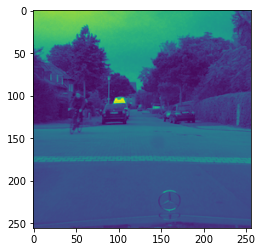

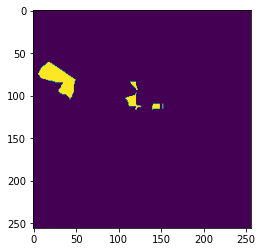

Image


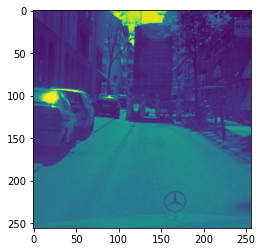

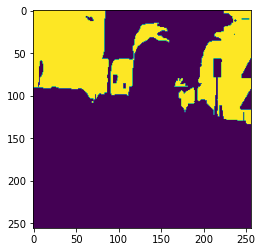

Image


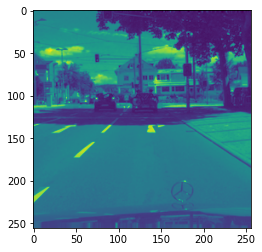

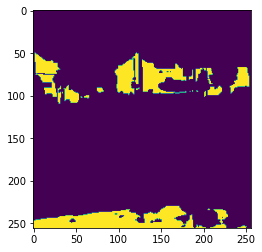

Image


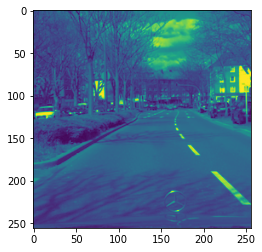

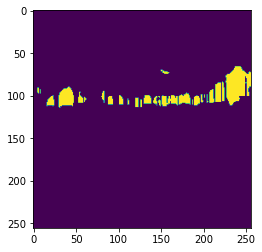

Image


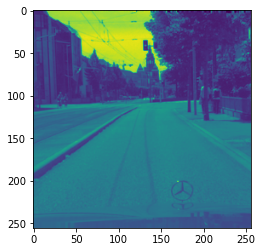

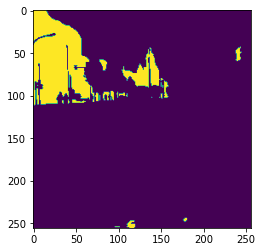

Image


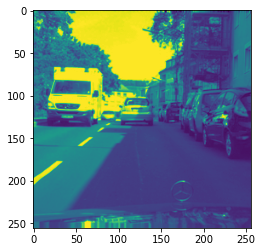

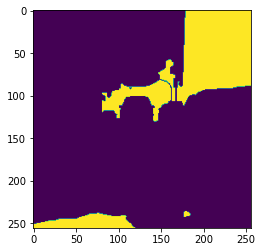

Image


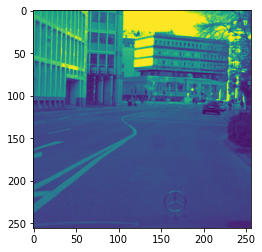

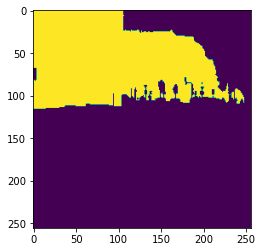

Image


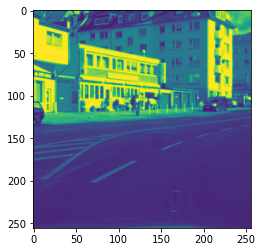

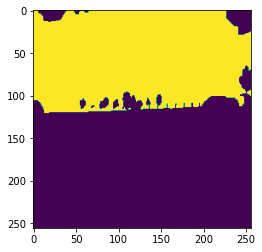

Image


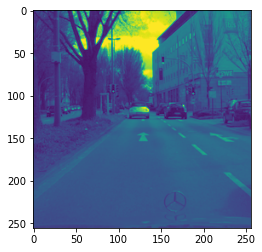

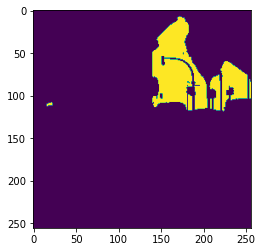

Image


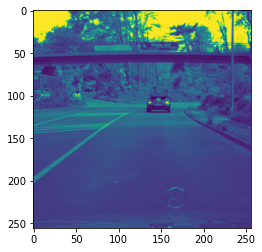

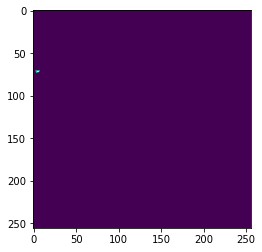

Image


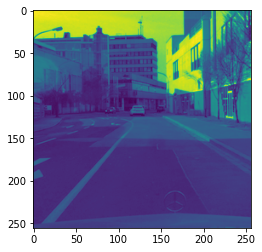

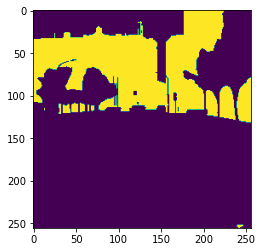

Image


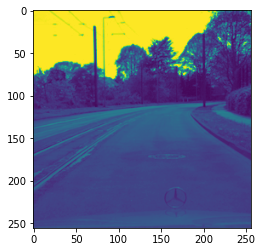

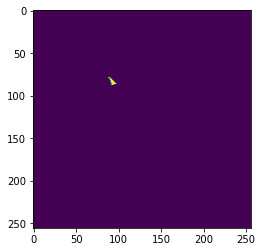

Image


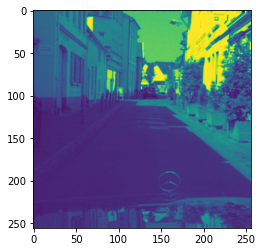

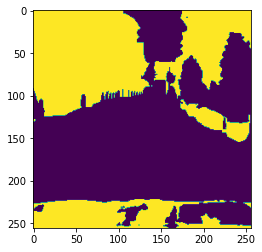

Image


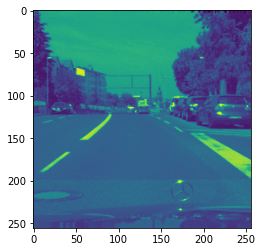

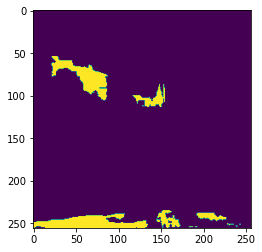

Image


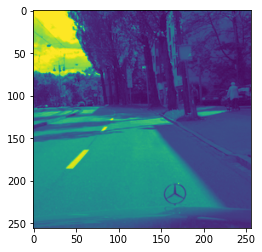

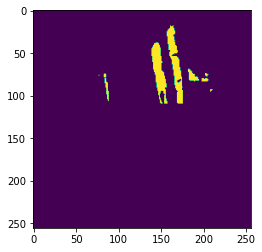

Image


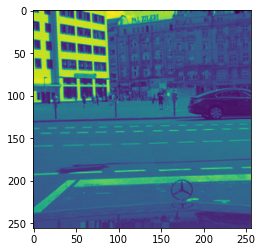

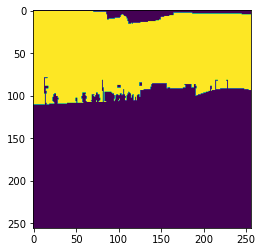

Image


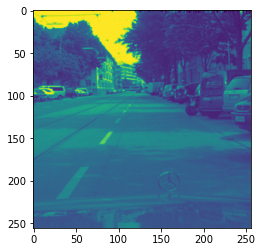

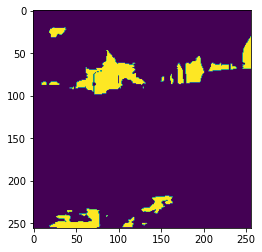

Image


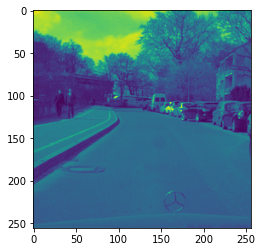

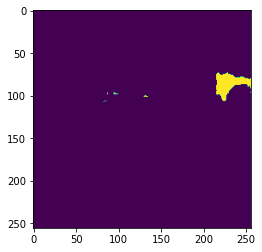

Image


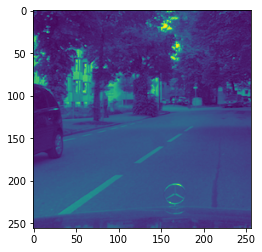

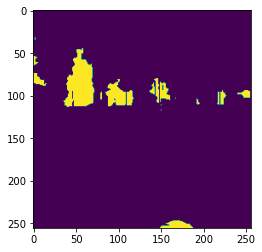

Image


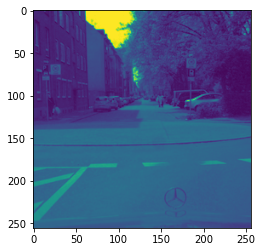

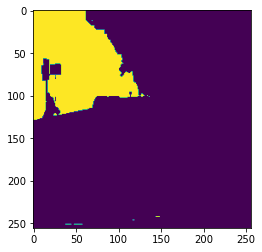

In [6]:
for i in range(0,batch):
    #Add Colors later on 
    #new_img = torch.permute(real_img[1],(1,2,0))
    print("Image")
    plt.imshow(real_img[i].numpy()[0])
    save_image((real_img[i]+1),f"data/{i}_image.png")
    plt.show()
    #print("Segmentation")
    plt.imshow(real_mask[i].numpy()[3])
   # save_image((real_mask[i]+1),f"{i}_seg.png")
    plt.show()